In [1]:
# Manipulação
import pandas as pd
import numpy as np

# Modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Métricas
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve
)

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/allansantos881/Iblue-desafio-tecnico/refs/heads/main/Car_Insurance_Claim.csv" # Subi o arquivo CSV do kaggle no github

In [3]:
df = pd.read_csv(url)

df.head() # Auditoria

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [24]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   age                     10000 non-null  object 
 2   gender                  10000 non-null  object 
 3   race                    10000 non-null  object 
 4   driving_experience      10000 non-null  object 
 5   education               10000 non-null  object 
 6   income                  10000 non-null  object 
 7   credit_score            10000 non-null  float64
 8   vehicle_ownership       10000 non-null  int64  
 9   vehicle_year            10000 non-null  object 
 10  married                 10000 non-null  int64  
 11  children                10000 non-null  int64  
 12  postal_code             10000 non-null  int64  
 13  annual_mileage          10000 non-null  float64
 14  vehicle_type            10000 non-null 

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


In [25]:
# Missing (qtd e %)
missing = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_report = pd.DataFrame({"Missing": missing, "Percentual (%)": missing_percent}).sort_values("Percentual (%)", ascending=False)
display(missing_report)

,Missing,Percentual (%)
id,0,0.0
age,0,0.0
gender,0,0.0
race,0,0.0
driving_experience,0,0.0
education,0,0.0
income,0,0.0
credit_score,0,0.0
vehicle_ownership,0,0.0
vehicle_year,0,0.0


In [26]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [27]:
df.columns = df.columns.str.lower()

In [28]:
bin_cols = ['vehicle_ownership', 'married', 'children', 'outcome']
for c in bin_cols:
    if c in df.columns:
        # garante que está 0/1
        df[c] = df[c].astype(int)

In [29]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [30]:
# Flags de missing
df['credit_score_missing'] = df['credit_score'].isna().astype(int)
df['annual_mileage_missing'] = df['annual_mileage'].isna().astype(int)

In [31]:
# Imputação por mediana
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].median())

In [32]:
# Checagem rápida: ainda tem NaN?
print("Total de NaNs no DF após imputação:", df.isna().sum().sum())

Total de NaNs no DF após imputação: 0


In [33]:
#PREPARAÇÃO DE FEATURES (One-Hot Encoding)
features = [
    'age',
    'gender',
    'race',
    'driving_experience',
    'education',
    'income',
    'credit_score',
    'credit_score_missing',
    'vehicle_ownership',
    'vehicle_year',
    'married',
    'children',
    'annual_mileage',
    'annual_mileage_missing',
    'vehicle_type',
    'speeding_violations',
    'duis',
    'past_accidents'
]

target = 'outcome'

X = df[features].copy()
y = df[target].copy()

In [34]:
# One-Hot para categóricas
X = pd.get_dummies(X, drop_first=True)

print("Shape X (após one-hot):", X.shape)

Shape X (após one-hot): (10000, 25)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [36]:
logit = LogisticRegression(max_iter=2000, solver='liblinear')
logit.fit(X_train, y_train)

y_pred_logit = logit.predict(X_test)
y_prob_logit = logit.predict_proba(X_test)[:, 1]

auc_logit = roc_auc_score(y_test, y_prob_logit)
f1_logit = f1_score(y_test, y_pred_logit)

print("=== Regressão Logística ===")
print(f"AUC: {auc_logit:.4f}")
print(f"F1:  {f1_logit:.4f}\n")
print(classification_report(y_test, y_pred_logit))

print("Matriz de Confusão:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_logit),
                     index=["Real 0", "Real 1"],
                     columns=["Pred 0", "Pred 1"]))

=== Regressão Logística ===
AUC: 0.8745
F1:  0.6887

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2060
           1       0.74      0.64      0.69       940

    accuracy                           0.82      3000
   macro avg       0.79      0.77      0.78      3000
weighted avg       0.81      0.82      0.81      3000

Matriz de Confusão:


,Pred 0,Pred 1
Real 0,1848,212
Real 1,335,605


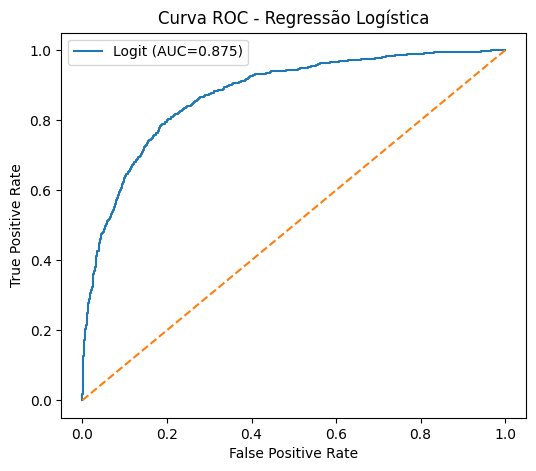

In [37]:
# Curva ROC
fpr, tpr, thr = roc_curve(y_test, y_prob_logit)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logit (AUC={auc_logit:.3f})")
plt.plot([0,1],[0,1],'--')
plt.title("Curva ROC - Regressão Logística")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [38]:
coef = pd.DataFrame({
    'feature': X.columns,
    'coef': logit.coef_[0]
}).sort_values('coef', ascending=False)

coef['odds_ratio'] = np.exp(coef['coef'])

print("Top 12 fatores que AUMENTAM risco (coef positivo):")
display(coef.head(12))

print("Top 12 fatores que REDUZEM risco (coef negativo):")
display(coef.tail(12).sort_values('coef'))

Top 12 fatores que AUMENTAM risco (coef positivo):


,feature,coef,odds_ratio
23,vehicle_year_before 2015,0.925054,2.522003
13,gender_male,0.850761,2.341428
20,income_poverty,0.448758,1.566366
22,income_working class,0.188432,1.207355
18,education_none,0.134083,1.143488
5,annual_mileage,0.000016,1.000016
6,annual_mileage_missing,0.000000,1.000000
1,credit_score_missing,0.000000,1.000000
24,vehicle_type_sports car,-0.009971,0.990079
14,race_minority,-0.049243,0.951949


Top 12 fatores que REDUZEM risco (coef negativo):


,feature,coef,odds_ratio
2,vehicle_ownership,-1.108958,0.329903
16,driving_experience_20-29y,-0.538412,0.583674
9,past_accidents,-0.494778,0.609706
15,driving_experience_10-19y,-0.456171,0.633706
21,income_upper class,-0.430386,0.650258
11,age_40-64,-0.380421,0.683574
3,married,-0.353099,0.702507
4,children,-0.259999,0.771052
12,age_65+,-0.223062,0.800065
8,duis,-0.197416,0.820849


In [39]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

auc_tree = roc_auc_score(y_test, y_prob_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("=== Árvore de Decisão (max_depth=4) ===")
print(f"AUC: {auc_tree:.4f}")
print(f"F1:  {f1_tree:.4f}\n")
print(classification_report(y_test, y_pred_tree))

=== Árvore de Decisão (max_depth=4) ===
AUC: 0.8567
F1:  0.7144

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2060
           1       0.65      0.80      0.71       940

    accuracy                           0.80      3000
   macro avg       0.77      0.80      0.78      3000
weighted avg       0.82      0.80      0.81      3000



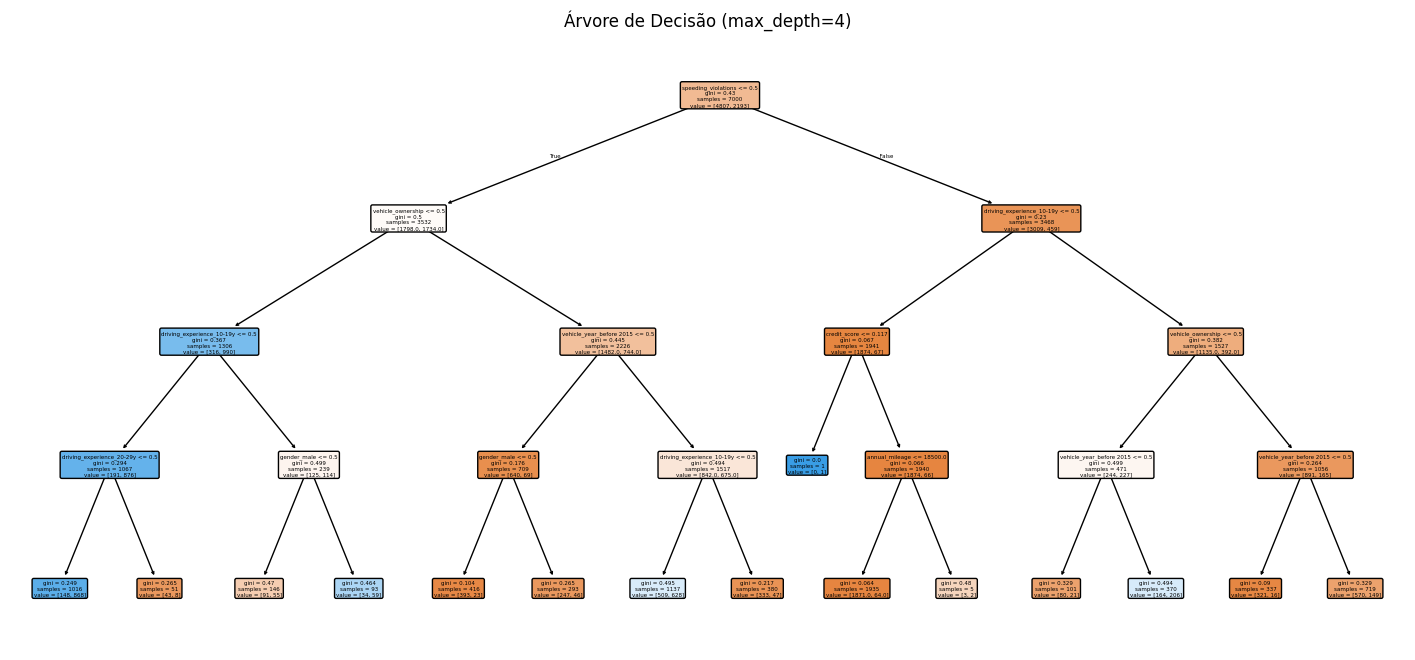

In [40]:
# Plot da árvore
plt.figure(figsize=(18, 8))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, max_depth=4)
plt.title("Árvore de Decisão (max_depth=4)")
plt.show()

### Bônus — Modelo interpretável (Regressão Logística / Árvore)

Foi treinada uma **Regressão Logística** por ser um modelo **interpretável**, permitindo avaliar o impacto das variáveis na probabilidade de sinistro.  
A validação foi realizada com **AUC** (discriminação) e **F1-score** (equilíbrio entre precisão e recall).  
Também foi treinada uma **Árvore de Decisão (profundidade limitada)** para visualização de regras e interpretação.


A regressão logística apresentou AUC de 0.875, indicando excelente capacidade discriminatória.
O modelo confirma que experiência, score e quilometragem são os principais drivers de risco.

A árvore de decisão foi utilizada para visualização de regras.
Ela mostrou que a combinação de experiência, score e comportamento explica grande parte da separação de risco.

### Conclusão do Modelo

A regressão logística apresentou AUC de 0.875, indicando excelente capacidade de discriminação entre clientes com e sem sinistro.

Os principais fatores associados ao aumento de risco foram:
- Baixa experiência
- Baixo credit score
- Alta quilometragem

A árvore de decisão confirmou os principais drivers identificados na EDA, reforçando a robustez das conclusões.
